## Airline Satisfaction Predictions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Part 1: take a look at data

In [3]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [4]:
df_train.shape

(103904, 25)

#### Part 2: clean the data

In [5]:
df_train.drop(columns = "Unnamed: 0", inplace = True)

In [6]:
df_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df_train["Arrival Delay in Minutes"].fillna(0,inplace = True)
#df_train.dropna(subset =["Arrival Delay in Minutes"], inplace = True)

In [8]:
df_train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [10]:
df_train["Arrival Delay in Minutes"] = df_train["Arrival Delay in Minutes"].astype(int)

In [11]:
df_train.dtypes

id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

In [12]:
df_train.value_counts("Customer Type")

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [13]:
df_train["Customer Type"] = df_train["Customer Type"].map({"Loyal Customer":1,
                                               "disloyal Customer":2})
df_train.value_counts("Customer Type")

Customer Type
1    84923
2    18981
Name: count, dtype: int64

In [14]:
df_train.value_counts("Type of Travel")

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [15]:
df_train["Type of Travel"] =df_train["Type of Travel"].map({"Business travel":1,
                                               "Personal Travel":2})

In [16]:
df_train.value_counts("Type of Travel")

Type of Travel
1    71655
2    32249
Name: count, dtype: int64

In [17]:
df_train.value_counts("Class")

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [18]:
df_train["Class"] =df_train["Class"].map({"Business":1,
                                               "Eco":2,
                                          "Eco Plus":3})

In [19]:
df_train.value_counts("Gender")

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [20]:
df_train["Gender"] =df_train["Gender"].map({"Female":1,
                                               "Male":2})

In [21]:
df_train.value_counts("Gender")

Gender
1    52727
2    51177
Name: count, dtype: int64

In [22]:
df_train.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       2              1   13               2      3              460   
1    5047       2              2   25               1      1              235   
2  110028       1              1   26               1      1             1142   
3   24026       1              1   25               1      1              562   
4  119299       2              1   61               1      1              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                        18   
1                           1                         6   
2                           0                         0   
3                          11                         9   
4                           0                         0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

#### Part 3: EDA

##### 3.1 scaterplot

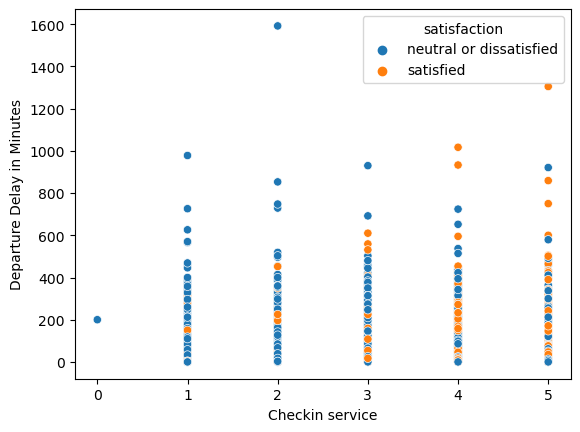

In [23]:
sns.scatterplot(data = df_train,
              x = "Checkin service",
              y = "Departure Delay in Minutes",
              hue = "satisfaction");

##### 3.2 Pairplot

C:\Users\Shorif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


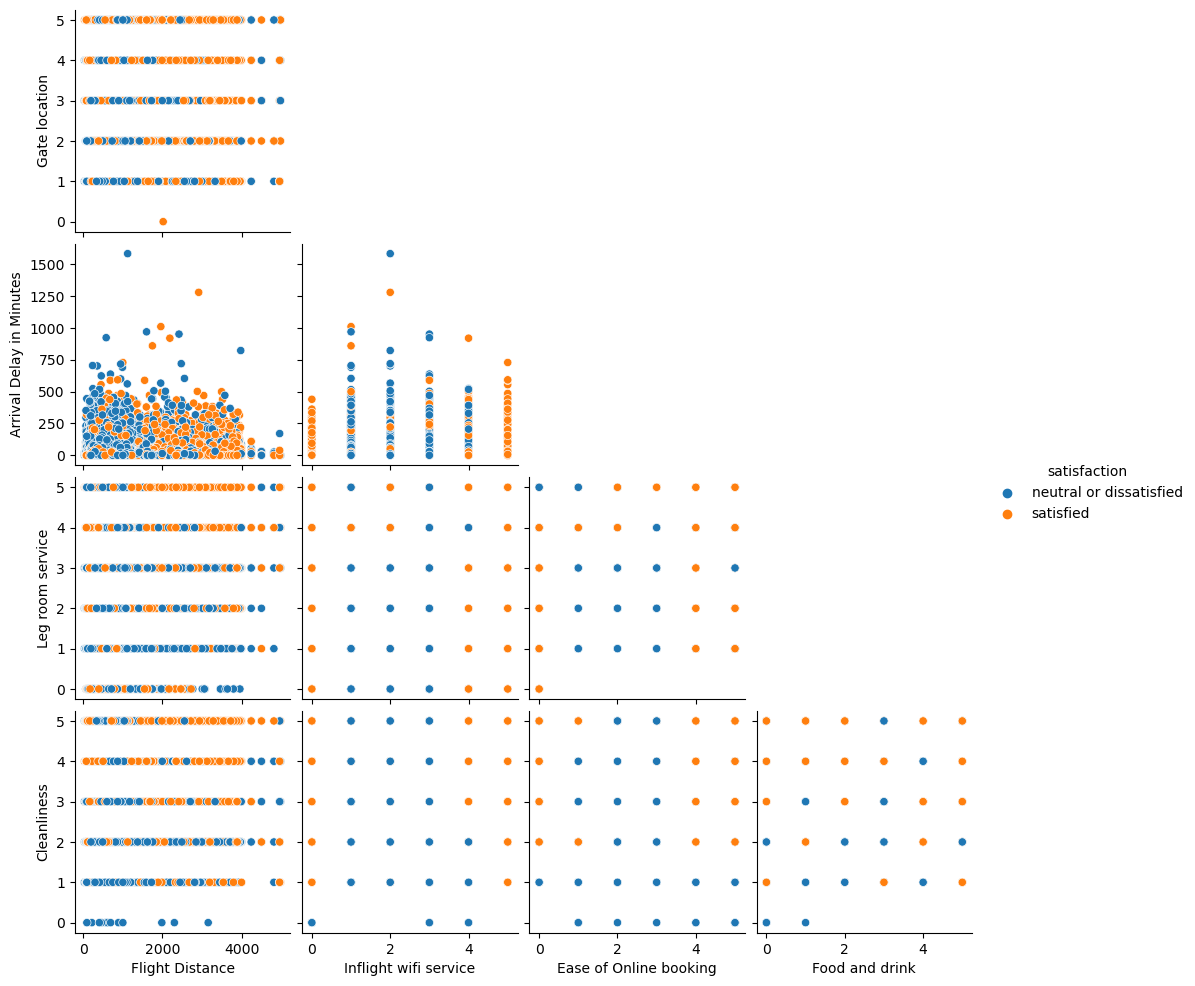

In [24]:
sns.pairplot(data = df_train,
            x_vars = ["Flight Distance","Inflight wifi service","Ease of Online booking","Food and drink"],
            y_vars = ["Gate location","Arrival Delay in Minutes","Leg room service","Cleanliness"],
             hue = "satisfaction",
            corner = True);

<Axes: xlabel='Seat comfort', ylabel='Inflight entertainment'>

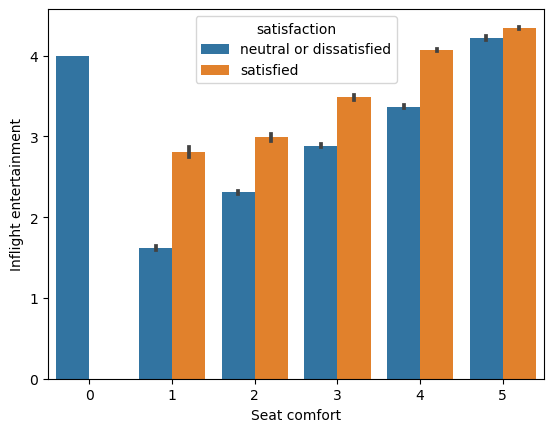

In [25]:
sns.barplot(data = df_train,
           x = "Seat comfort",
           y = "Inflight entertainment",
           hue = "satisfaction")

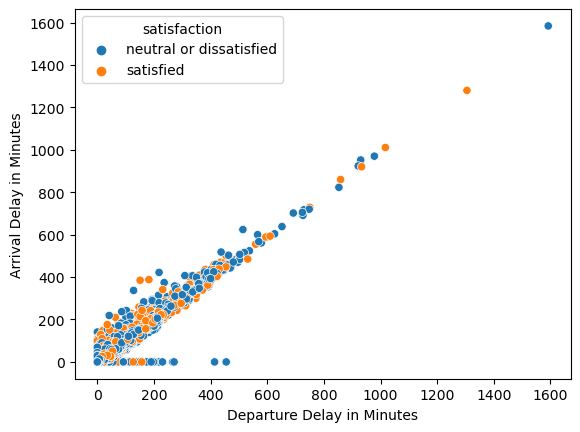

In [26]:
sns.scatterplot(data = df_train,
               x = "Departure Delay in Minutes",
               y = "Arrival Delay in Minutes",
               hue = "satisfaction");

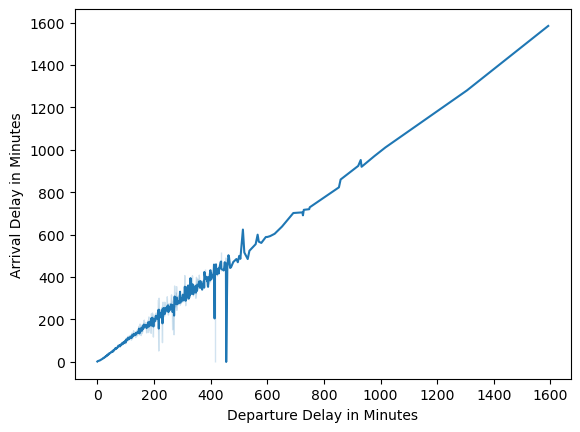

In [27]:
sns.lineplot(data = df_train,
               x = "Departure Delay in Minutes",
               y = "Arrival Delay in Minutes");
               #hue = "satisfaction");

#### part 4: Plotly

In [28]:
import plotly.express as px

In [29]:
px.scatter_3d(data_frame = df_train, 
              x = "Gender", 
              y = "Age", 
              z = "Flight Distance", 
              color = "satisfaction");
plt.show()

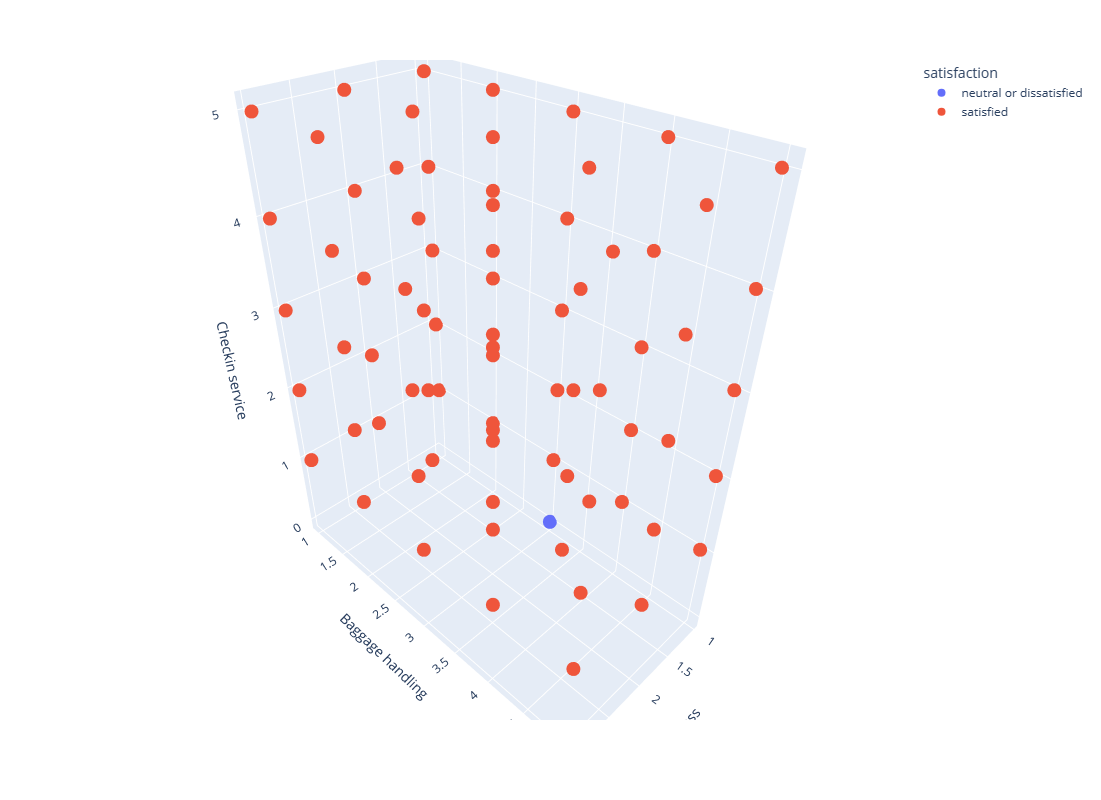

In [30]:
px.scatter_3d(df_train, 
              width = 800,
              height = 800,
              x='Class', 
              y='Baggage handling', 
              z='Checkin service', 
              color='satisfaction')

#### Modeling

In [31]:
df_train["satisfaction"].value_counts(normalize = True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

In [32]:
X = df_train.drop(columns = "satisfaction")
y = df_train["satisfaction"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### K-Nearest Neighbors (KNN)

In [35]:
knn = KNeighborsClassifier()

In [36]:
# Fit
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [37]:
knn.score(X_train_sc, y_train)

0.9477723026383328

In [38]:
knn.score(X_test_sc, y_test)

0.9269325531259625

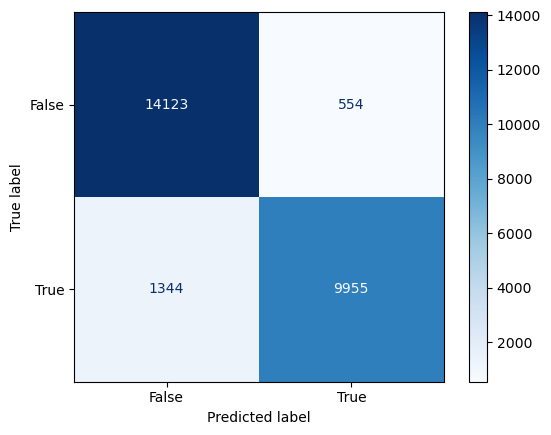

In [39]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues', display_labels = ["False", "True"]);

In [41]:
scores = []

for k in range(3, 32, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append({'k' : k, 'Training Accuracy' : acc_train, 'Test Accuracy' : acc_test})
df_scores = pd.DataFrame(scores)
df_scores

k  Training Accuracy  Test Accuracy
0    3           0.957435       0.925393
1    5           0.947772       0.926933
2    7           0.943512       0.928472
3    9           0.939855       0.928010
4   11           0.937352       0.928973
5   13           0.935864       0.928780
6   15           0.934542       0.927779
7   17           0.933670       0.927279
8   19           0.932361       0.926702
9   21           0.931847       0.926509
10  23           0.930962       0.925778
11  25           0.930384       0.924430
12  27           0.929730       0.924238
13  29           0.928960       0.924122
14  31           0.928395       0.923352

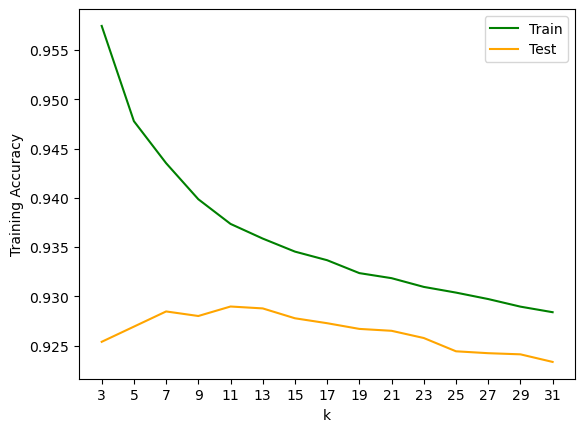

In [42]:
sns.lineplot(data = df_scores, x = 'k', y = 'Training Accuracy', c='Green', label='Train')
sns.lineplot(data = df_scores, x = 'k', y = 'Test Accuracy', c='orange', label='Test')
plt.xticks(range(3, 32, 2));

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sc, y_train)
knn.score(X_test_sc,y_test)

0.925392670157068

#### Logistic Regression (LR)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [45]:
lr.score(X_train_sc, y_train)

0.8759752592136331

In [46]:
lr.score(X_test_sc, y_test)

0.8772328303048968

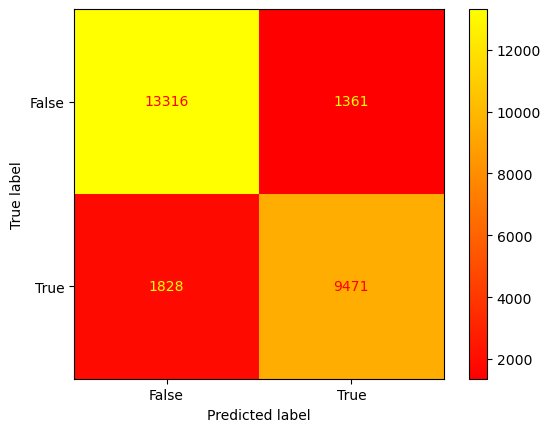

In [49]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_sc, y_test, cmap = 'autumn', display_labels = ["False", "True"]);

In [50]:
satisfaction = []
for k in range (3,32,2):
    lr = LogisticRegression()
    lr.fit(X_train_sc, y_train)
    acc_train = lr.score(X_train_sc, y_train)
    acc_test = lr.score(X_test_sc, y_test)
    satisfaction.append({'k' : k, 'Training Accuracy' :acc_train, 'Test Accuracy':acc_test})
    
df_satisfaction = pd.DataFrame(satisfaction)
df_satisfaction

k  Training Accuracy  Test Accuracy
0    3           0.875975       0.877233
1    5           0.875975       0.877233
2    7           0.875975       0.877233
3    9           0.875975       0.877233
4   11           0.875975       0.877233
5   13           0.875975       0.877233
6   15           0.875975       0.877233
7   17           0.875975       0.877233
8   19           0.875975       0.877233
9   21           0.875975       0.877233
10  23           0.875975       0.877233
11  25           0.875975       0.877233
12  27           0.875975       0.877233
13  29           0.875975       0.877233
14  31           0.875975       0.877233

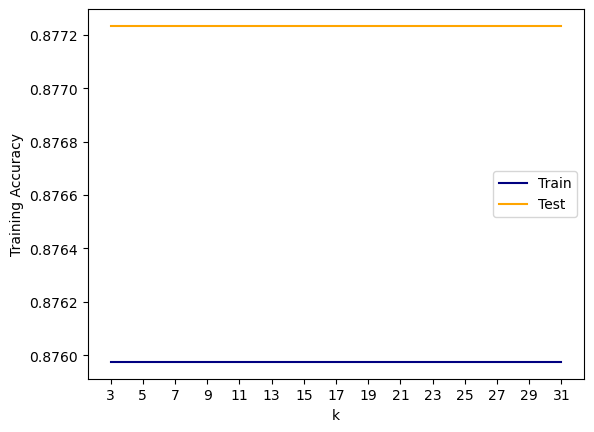

In [51]:
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Training Accuracy', c='navy', label='Train')
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Test Accuracy', c='orange', label='Test')
plt.xticks(range(3, 32, 2));

#### Random Forest Classifier (RFC)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [53]:
rf.score(X_train_sc, y_train)

0.9999871676419259

In [54]:
rf.score(X_test_sc, y_test)

0.9627733292269788

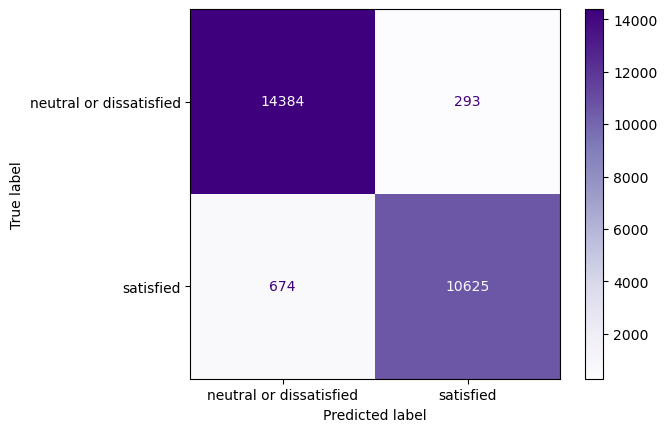

In [55]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');

In [56]:
satisfaction = []
for k in range (3,32,2):
    rf = RandomForestClassifier()
    rf.fit(X_train_sc, y_train)
    acc_train = rf.score(X_train_sc, y_train)
    acc_test = rf.score(X_test_sc, y_test)
    satisfaction.append({'k' : k, 'Training Accuracy' :acc_train, 'Test Accuracy':acc_test})
    
df_satisfaction = pd.DataFrame(satisfaction)
df_satisfaction

k  Training Accuracy  Test Accuracy
0    3           1.000000       0.963043
1    5           1.000000       0.963158
2    7           1.000000       0.963466
3    9           1.000000       0.962812
4   11           0.999987       0.962927
5   13           1.000000       0.963158
6   15           1.000000       0.962927
7   17           1.000000       0.961888
8   19           1.000000       0.962619
9   21           1.000000       0.963505
10  23           1.000000       0.962966
11  25           1.000000       0.962927
12  27           1.000000       0.962889
13  29           0.999974       0.963274
14  31           1.000000       0.962812

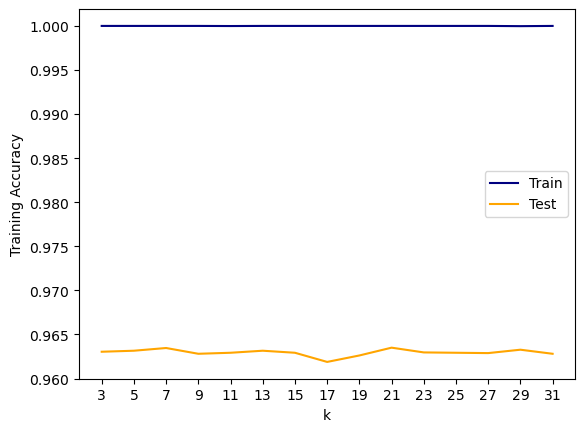

In [57]:
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Training Accuracy', c='navy', label='Train')
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Test Accuracy', c='orange', label='Test')
plt.xticks(range(3, 32, 2));

In [60]:
df_train.to_csv('data/cleaned_train.csv')
#df_test.to_csv('data/cleaned_test.csv')